In [3]:
import json
# load knowledge retrieval labels
data_dir = "/home/xwang/learn2aug/data/SimpleTOD/outputs/inference_only_model1_gold_action_retrieved_kg_gold_decision/results/"
retrieval_labels = json.load(open(data_dir + "result_retrieved_knowledge_label.json", "r"))

# load logits of different generation strategies
no_knowledge_logits = json.load(open(data_dir + "no_knowledge_logits.txt", "r"))
noisy_knowledge_logits = json.load(open(data_dir + "noisy_knowledge-updated_logits.txt", "r"))
gold_knowledge_logits = json.load(open(data_dir + "gold_knowledge_logits.txt", "r"))
normal_retrieval_logits = json.load(open(data_dir + "normal_retrieval_logits.txt", "r"))
gold_knowledge_retrieved_logits = json.load(open(data_dir + "gold_knowledge_retrieved-updated_logits.txt", "r"))

In [18]:
# check the equal number of samples
assert len(retrieval_labels) == len(no_knowledge_logits) == len(gold_knowledge_logits) == len(normal_retrieval_logits)

In [4]:
# convert string to float
no_knowledge_logits = [float(x) for x in no_knowledge_logits]
noisy_knowledge_logits = [float(x) for x in noisy_knowledge_logits]
gold_knowledge_logits = [float(x) for x in gold_knowledge_logits]
normal_retrieval_logits = [float(x) for x in normal_retrieval_logits]
gold_knowledge_retrieved_logits = [float(x) for x in gold_knowledge_retrieved_logits]

In [5]:

# calculate the scores
print("Average score of no knowledge logits: ", sum(no_knowledge_logits) / len(no_knowledge_logits))
print("Average score of noisy knowledge logits: ", sum(noisy_knowledge_logits) / len(noisy_knowledge_logits))
print("Average score of gold knowledge logits: ", sum(gold_knowledge_logits) / len(gold_knowledge_logits))
print("Average score of normal retrieval logits: ", sum(normal_retrieval_logits) / len(normal_retrieval_logits))
print("Average score of gold knowledge retrieved logits: ", sum(gold_knowledge_retrieved_logits) / len(gold_knowledge_retrieved_logits))

Average score of no knowledge logits:  9.342534389620006
Average score of noisy knowledge logits:  9.291129593721664
Average score of gold knowledge logits:  8.335680042443787
Average score of normal retrieval logits:  8.314920612442023
Average score of gold knowledge retrieved logits:  9.312208537879872


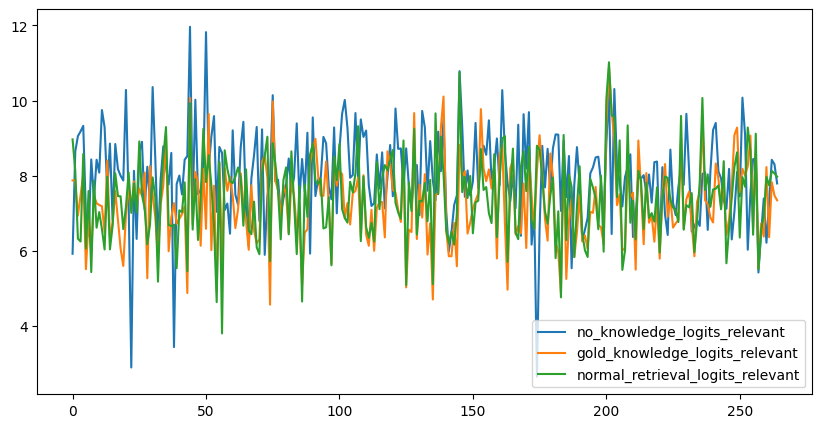

In [10]:
# examine the impact of retrieved relevant knowledge
%matplotlib inline
import matplotlib.pyplot as plt

relevant_knowledge_index = []
for i in range(len(retrieval_labels)):
    if retrieval_labels[i] == 1:
        relevant_knowledge_index.append(i)

# index of samples with retrieved relevant knowledge
no_knowledge_logits_relevant = [no_knowledge_logits[i] for i in relevant_knowledge_index]
gold_knowledge_logits_relevant = [gold_knowledge_logits[i] for i in relevant_knowledge_index]
normal_retrieval_logits_relevant = [normal_retrieval_logits[i] for i in relevant_knowledge_index]

# line plot the value difference of logits
plt.figure(figsize=(10, 5))
plt.plot(no_knowledge_logits_relevant, label="no_knowledge_logits_relevant")
plt.plot(gold_knowledge_logits_relevant, label="gold_knowledge_logits_relevant")
plt.plot(normal_retrieval_logits_relevant, label="normal_retrieval_logits_relevant")
plt.legend()
plt.show()


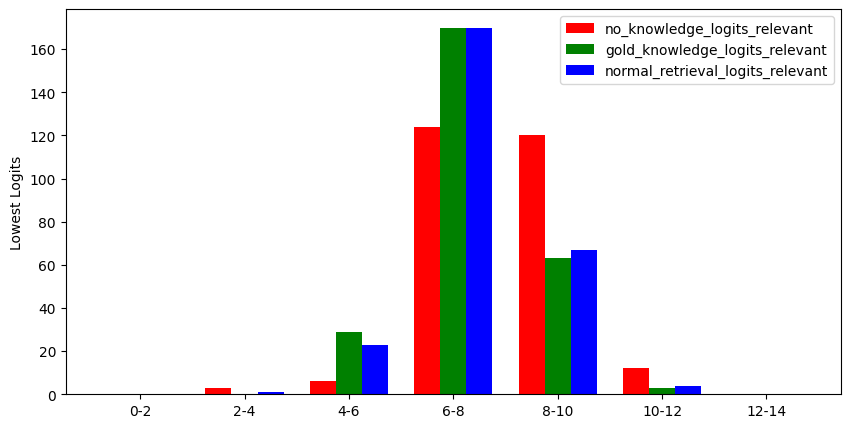

In [14]:
# bar plot the frequency of logit values in different range

ranges = [(0, 2), (2, 4), (4, 6), (6, 8), (8, 10), (10, 12), (12, 14)]

no_knowledge_logits_relevant_ranges = [0] * len(ranges)
gold_knowledge_logits_relevant_ranges = [0] * len(ranges)
normal_retrieval_logits_relevant_ranges = [0] * len(ranges)

for i in range(len(relevant_knowledge_index)):
    for j in range(len(ranges)):
        if ranges[j][0] <= no_knowledge_logits_relevant[i] < ranges[j][1]:
            no_knowledge_logits_relevant_ranges[j] += 1
        if ranges[j][0] <= gold_knowledge_logits_relevant[i] < ranges[j][1]:
            gold_knowledge_logits_relevant_ranges[j] += 1
        if ranges[j][0] <= normal_retrieval_logits_relevant[i] < ranges[j][1]:
            normal_retrieval_logits_relevant_ranges[j] += 1

# bar plots side by side
import numpy as np
import matplotlib.pyplot as plt

N = len(ranges)
ind = np.arange(N)  # the x locations for the groups
width = 0.25  # the width of the bars

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

yvals = no_knowledge_logits_relevant_ranges
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = gold_knowledge_logits_relevant_ranges
rects2 = ax.bar(ind + width, zvals, width, color='g')
kvals = normal_retrieval_logits_relevant_ranges
rects3 = ax.bar(ind + width * 2, kvals, width, color='b')

ax.set_ylabel('Lowest Logits')
ax.set_xticks(ind + width)
ax.set_xticklabels(('0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14'))
ax.legend((rects1[0], rects2[0], rects3[0]), ('no_knowledge_logits_relevant', 'gold_knowledge_logits_relevant',
                                             'normal_retrieval_logits_relevant'))
plt.show()

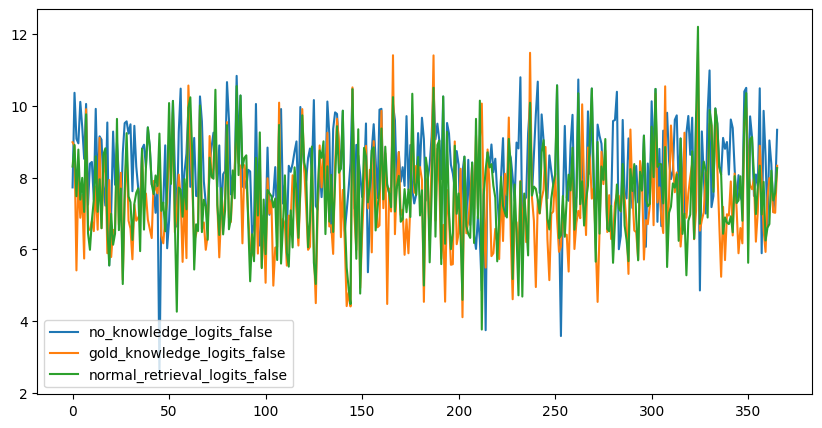

In [11]:
false_retrieve_index = []
for i in range(len(retrieval_labels)):
    if retrieval_labels[i] == 0:
        false_retrieve_index.append(i)

# index of samples with false retrieved knowledge
no_knowledge_logits_false = [no_knowledge_logits[i] for i in false_retrieve_index]
gold_knowledge_logits_false = [gold_knowledge_logits[i] for i in false_retrieve_index]
normal_retrieval_logits_false = [normal_retrieval_logits[i] for i in false_retrieve_index]


# line plot the value difference of logits
plt.figure(figsize=(10, 5))
plt.plot(no_knowledge_logits_false, label="no_knowledge_logits_false")
plt.plot(gold_knowledge_logits_false, label="gold_knowledge_logits_false")
plt.plot(normal_retrieval_logits_false, label="normal_retrieval_logits_false")
plt.legend()
plt.show()

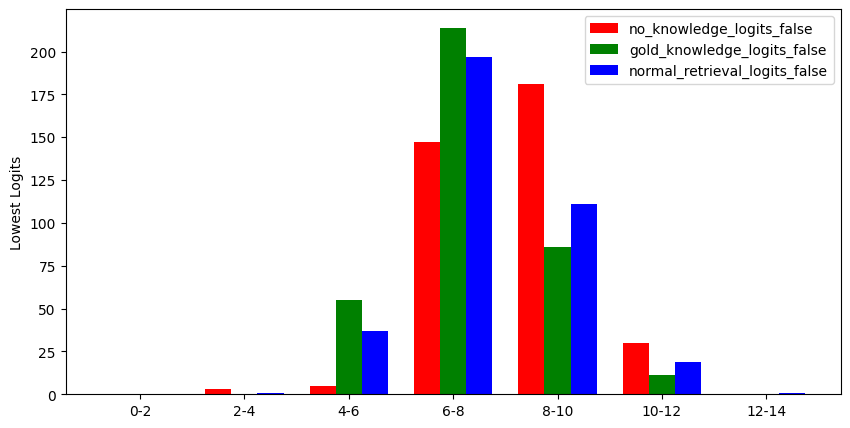

In [15]:
# bar plot the frequency of logit values in different range

ranges = [(0, 2), (2, 4), (4, 6), (6, 8), (8, 10), (10, 12), (12, 14)]

no_knowledge_logits_false_ranges = [0] * len(ranges)
gold_knowledge_logits_false_ranges = [0] * len(ranges)
normal_retrieval_logits_false_ranges = [0] * len(ranges)

for i in range(len(false_retrieve_index)):
    for j in range(len(ranges)):
        if ranges[j][0] <= no_knowledge_logits_false[i] < ranges[j][1]:
            no_knowledge_logits_false_ranges[j] += 1
        if ranges[j][0] <= gold_knowledge_logits_false[i] < ranges[j][1]:
            gold_knowledge_logits_false_ranges[j] += 1
        if ranges[j][0] <= normal_retrieval_logits_false[i] < ranges[j][1]:
            normal_retrieval_logits_false_ranges[j] += 1

# bar plots side by side
import numpy as np
import matplotlib.pyplot as plt

N = len(ranges)
ind = np.arange(N)  # the x locations for the groups
width = 0.25  # the width of the bars

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

yvals = no_knowledge_logits_false_ranges
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = gold_knowledge_logits_false_ranges
rects2 = ax.bar(ind + width, zvals, width, color='g')
kvals = normal_retrieval_logits_false_ranges
rects3 = ax.bar(ind + width * 2, kvals, width, color='b')

ax.set_ylabel('Lowest Logits')
ax.set_xticks(ind + width)
ax.set_xticklabels(('0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14'))
ax.legend((rects1[0], rects2[0], rects3[0]), ('no_knowledge_logits_false', 'gold_knowledge_logits_false',
                                             'normal_retrieval_logits_false'))
plt.show()

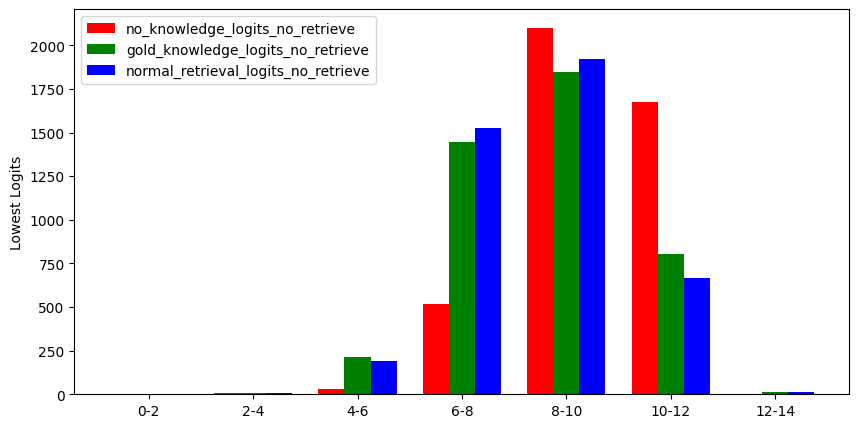

In [17]:
no_retrieve_require_index = []
for i in range(len(retrieval_labels)):
    if retrieval_labels[i] == -1:
        no_retrieve_require_index.append(i)

# index of samples with no retrieve required

no_knowledge_logits_no_retrieve = [no_knowledge_logits[i] for i in no_retrieve_require_index]
gold_knowledge_logits_no_retrieve = [gold_knowledge_logits[i] for i in no_retrieve_require_index]
normal_retrieval_logits_no_retrieve = [normal_retrieval_logits[i] for i in no_retrieve_require_index]

# bar plot the frequency of logit values in different range

ranges = [(0, 2), (2, 4), (4, 6), (6, 8), (8, 10), (10, 12), (12, 14)]

no_knowledge_logits_no_retrieve_ranges = [0] * len(ranges)
gold_knowledge_logits_no_retrieve_ranges = [0] * len(ranges)
normal_retrieval_logits_no_retrieve_ranges = [0] * len(ranges)

for i in range(len(no_retrieve_require_index)):
    for j in range(len(ranges)):
        if ranges[j][0] <= no_knowledge_logits_no_retrieve[i] < ranges[j][1]:
            no_knowledge_logits_no_retrieve_ranges[j] += 1
        if ranges[j][0] <= gold_knowledge_logits_no_retrieve[i] < ranges[j][1]:
            gold_knowledge_logits_no_retrieve_ranges[j] += 1
        if ranges[j][0] <= normal_retrieval_logits_no_retrieve[i] < ranges[j][1]:
            normal_retrieval_logits_no_retrieve_ranges[j] += 1

# bar plots side by side
import numpy as np
import matplotlib.pyplot as plt

N = len(ranges)
ind = np.arange(N)  # the x locations for the groups
width = 0.25  # the width of the bars

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)

yvals = no_knowledge_logits_no_retrieve_ranges
rects1 = ax.bar(ind, yvals, width, color='r')
zvals = gold_knowledge_logits_no_retrieve_ranges
rects2 = ax.bar(ind + width, zvals, width, color='g')
kvals = normal_retrieval_logits_no_retrieve_ranges
rects3 = ax.bar(ind + width * 2, kvals, width, color='b')

ax.set_ylabel('Lowest Logits')
ax.set_xticks(ind + width)
ax.set_xticklabels(('0-2', '2-4', '4-6', '6-8', '8-10', '10-12', '12-14'))
ax.legend((rects1[0], rects2[0], rects3[0]), ('no_knowledge_logits_no_retrieve', 'gold_knowledge_logits_no_retrieve',
                                             'normal_retrieval_logits_no_retrieve'))
plt.show()

In [1]:
import json

generated_outputs_dir = '/home/xwang/learn2aug/data/SimpleTOD/outputs/inference_only_model1_gold_action_retrieved_kg_gold_decision/results/result_noisy_knowledge-updated.json'
generated_outputs = json.load(open(generated_outputs_dir, 'r'))

In [2]:
generated_outputs[1]
word1 = "<|knowledge|>"
word2 = "<|endofknowledge|>"

count = 0 
for output in generated_outputs:
    output = output.split()
    assert word1 in output
    assert word2 in output

    # get the index of word1 and word2
    word1_index = output.index(word1)
    word2_index = output.index(word2)
    if word1_index != word2_index - 1:
        count += 1

print(count)
print(len(generated_outputs))

270
4964
